In [1]:
# doing exploaration data analysis of bitcoin data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import datetime as dt
import os
import sys
import time


In [2]:
# read data
df=pd.read_csv('E:/KDSH/btc_1h.csv')
df.head()

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199
1,2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006
2,2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572
3,2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030
4,2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329


## Bollinger Band

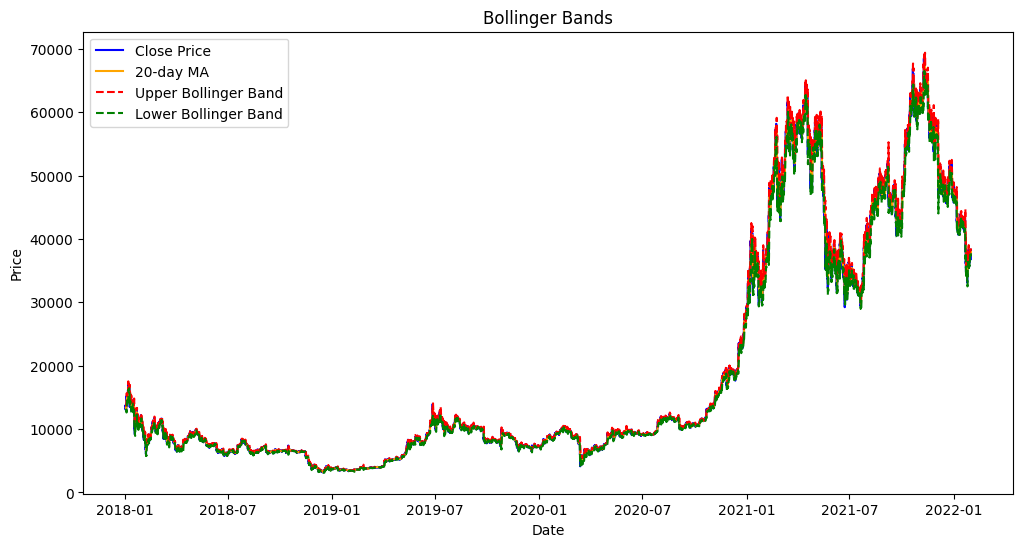

In [3]:

df['datetime'] = pd.to_datetime(df['datetime'])

# Calculate the 20-day moving average and standard deviation
df['20_MA'] = df['close'].rolling(window=20).mean()
df['20_std'] = df['close'].rolling(window=20).std()

# Calculate upper and lower Bollinger Bands
df['upper_band'] = df['20_MA'] + (2 * df['20_std'])
df['lower_band'] = df['20_MA'] - (2 * df['20_std'])

# Store Bollinger Bands information in new columns
df['UBB'] = df['upper_band']
df['LBB'] = df['lower_band']
df['BBW'] = df['upper_band'] - df['lower_band']


# Plot the Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['close'], label='Close Price', color='blue')
plt.plot(df['datetime'], df['20_MA'], label='20-day MA', color='orange')
plt.plot(df['datetime'], df['upper_band'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(df['datetime'], df['lower_band'], label='Lower Bollinger Band', color='green', linestyle='--')

plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Relative Strength Index (momentum indicator) 

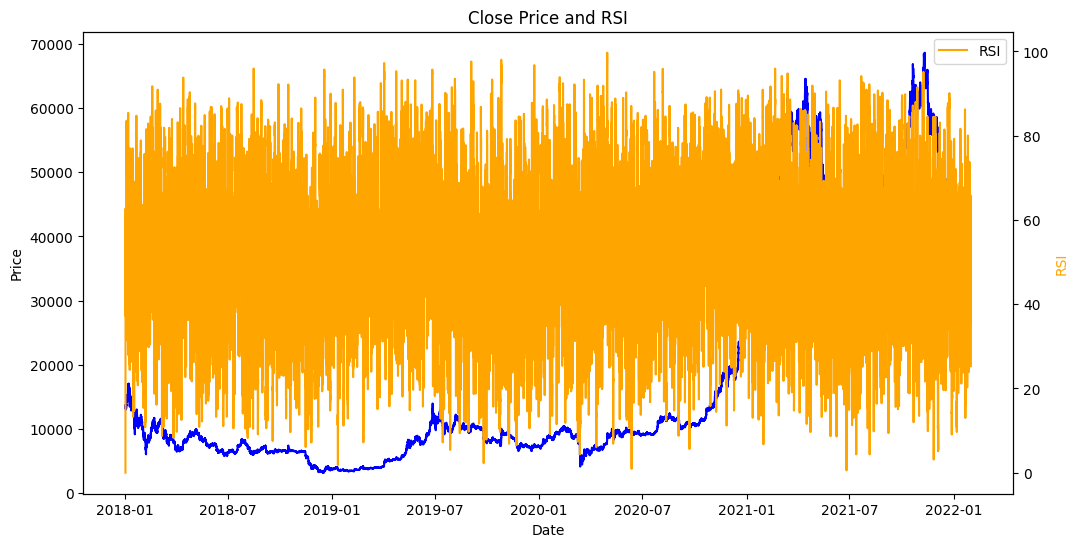

In [4]:
# function to calculate RSI
def calculate_rsi(data, column_name, period=14):
    close_delta = data['close'].diff(1)
    gain = close_delta.where(close_delta > 0, 0)
    loss = -close_delta.where(close_delta < 0, 0)

    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()

    relative_strength = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + relative_strength))

    data[column_name] = rsi

# Calculate RSI and add it to the DataFrame
calculate_rsi(df, 'RSI')

# Plot the Close Price and RSI
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['close'], label='Close Price', color='blue')
plt.title('Close Price and RSI')
plt.xlabel('Date')
plt.ylabel('Price')

# Create a secondary y-axis for RSI
ax2 = plt.gca().twinx()
ax2.plot(df['datetime'], df['RSI'], label='RSI', color='orange')
ax2.set_ylabel('RSI', color='orange')
ax2.legend()

plt.show()

# ULTOSC ( The Ultimate Oscillator )

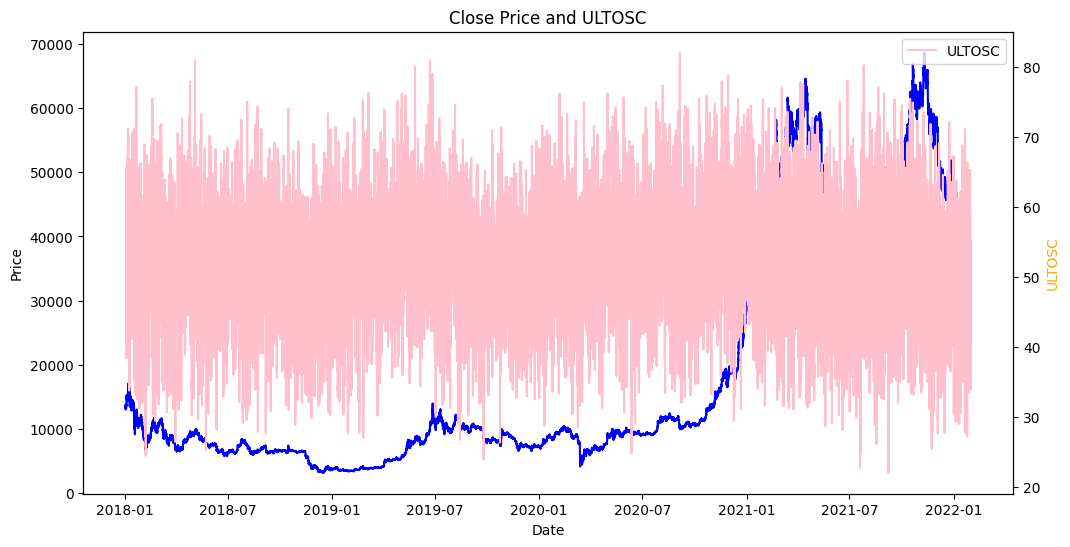

In [5]:
# function to calculate ULTOSC
def calculate_ultosc(data, column_name, period1=7, period2=14, period3=28):
    average1 = (data['close'] - data['low']).rolling(window=period1).sum() / (data['high'] - data['low']).rolling(window=period1).sum()
    average2 = (data['close'] - data['low']).rolling(window=period2).sum() / (data['high'] - data['low']).rolling(window=period2).sum()
    average3 = (data['close'] - data['low']).rolling(window=period3).sum() / (data['high'] - data['low']).rolling(window=period3).sum()

    ultosc = 100 * (4 * average1 + 2 * average2 + average3) / (4 + 2 + 1)

    data[column_name] = ultosc

# Calculate ULTOSC and add it to the DataFrame
calculate_ultosc(df, 'ULTOSC')

# Plot the Close Price and ULTOSC
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['close'], label='Close Price', color='blue')
plt.title('Close Price and ULTOSC')
plt.xlabel('Date')
plt.ylabel('Price')

# Create a secondary y-axis for ULTOSC
ax2 = plt.gca().twinx()
ax2.plot(df['datetime'], df['ULTOSC'], label='ULTOSC', color='pink')
ax2.set_ylabel('ULTOSC', color='orange')
ax2.legend()

plt.show()


# Close Price Percentage Variation

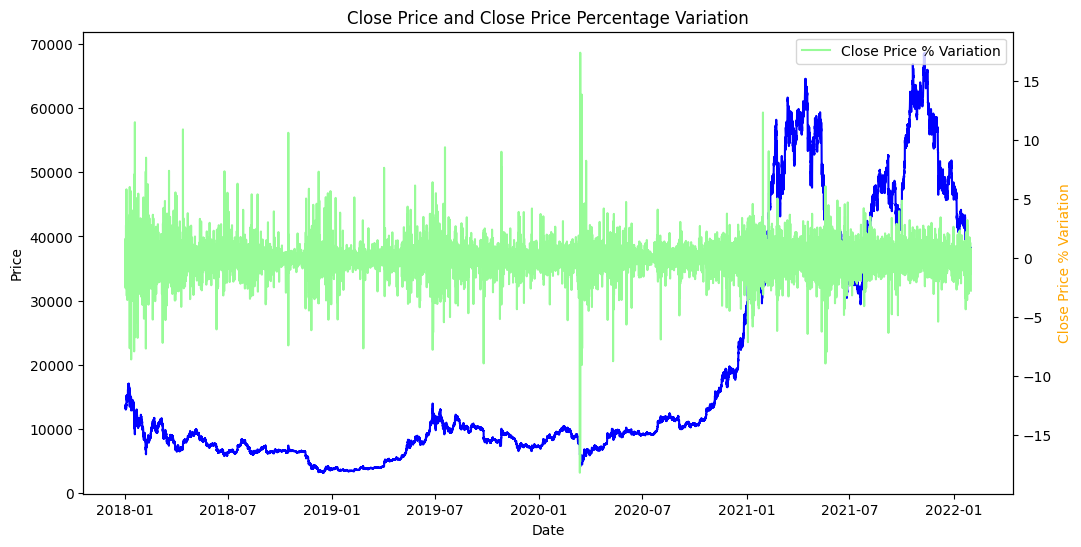

In [6]:
# Calculate Close Price Percentage Variation and add it to the DataFrame
df['Close_Price_Pct_Variation'] = df['close'].pct_change() * 100

# Plot the Close Price and Close Price Percentage Variation
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['close'], label='Close Price', color='blue')
plt.title('Close Price and Close Price Percentage Variation')
plt.xlabel('Date')
plt.ylabel('Price')

# Create a secondary y-axis for Close Price Percentage Variation
ax2 = plt.gca().twinx()
ax2.plot(df['datetime'], df['Close_Price_Pct_Variation'], label='Close Price % Variation', color='palegreen')
ax2.set_ylabel('Close Price % Variation', color='orange')
ax2.legend()

plt.show()


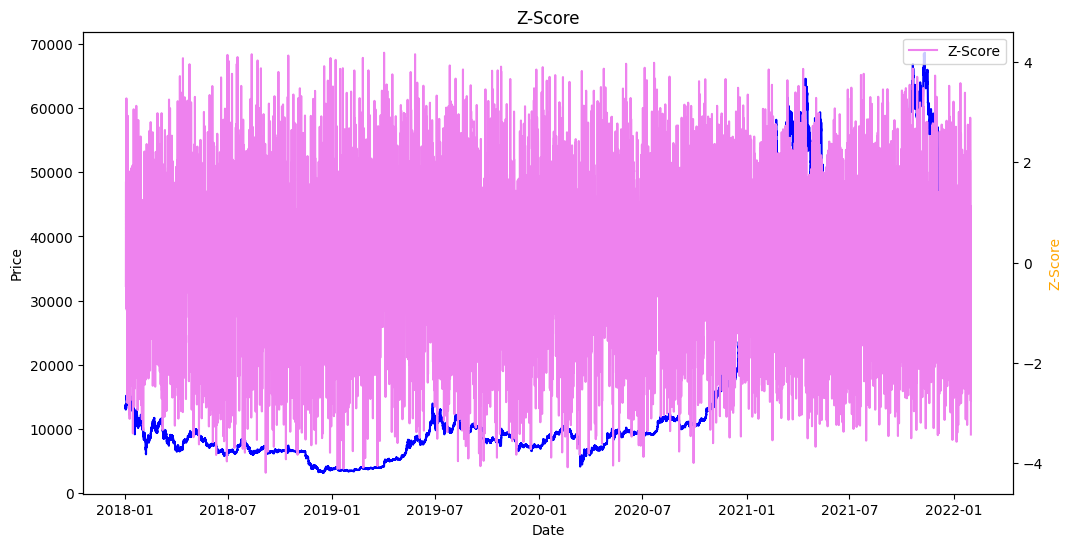

In [7]:

# Define a function to calculate Z-Score
def calculate_zscore(data, column_name, window=20):
    # Calculate the rolling mean and standard deviation
    rolling_mean = data['close'].rolling(window=window).mean()
    rolling_std = data['close'].rolling(window=window).std()

    # Calculate the Z-Score
    zscore = (data['close'] - rolling_mean) / rolling_std

    data[column_name] = zscore

# Calculate Z-Score and add it to the DataFrame
calculate_zscore(df, 'Z_Score')


# Plot the Close Price and Z-Score
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['close'], label='Close Price', color='blue')
plt.title('Z-Score')
plt.xlabel('Date')
plt.ylabel('Price')

# Create a secondary y-axis for Z-Score
ax2 = plt.gca().twinx()
ax2.plot(df['datetime'], df['Z_Score'], label='Z-Score', color='violet')
ax2.set_ylabel('Z-Score', color='orange')
ax2.legend()

plt.show()


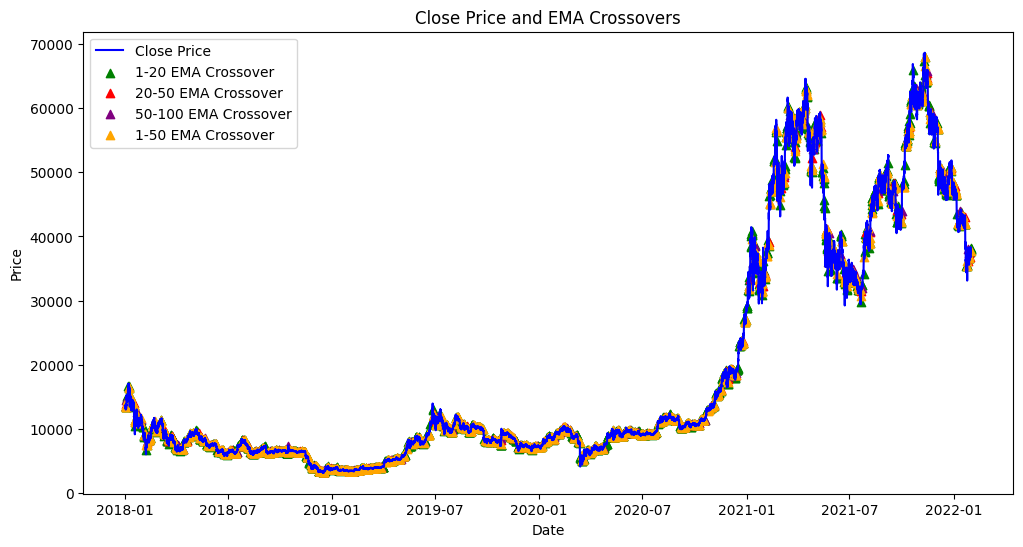

In [8]:
# a function to identify EMA crossovers
def identify_ema_crossovers(data):
    data['ema_1'] = data['close'].ewm(span=1, adjust=False).mean()
    data['ema_20'] = data['close'].ewm(span=20, adjust=False).mean()
    data['ema_50'] = data['close'].ewm(span=50, adjust=False).mean()
    data['ema_100'] = data['close'].ewm(span=100, adjust=False).mean()

    # Identify crossovers
    data['crossover_1_20'] = (data['ema_1'] > data['ema_20']) & (data['ema_1'].shift(1) <= data['ema_20'].shift(1))
    data['crossover_20_50'] = (data['ema_20'] > data['ema_50']) & (data['ema_20'].shift(1) <= data['ema_50'].shift(1))
    data['crossover_50_100'] = (data['ema_50'] > data['ema_100']) & (data['ema_50'].shift(1) <= data['ema_100'].shift(1))
    data['crossover_1_50'] = (data['ema_1'] > data['ema_50']) & (data['ema_1'].shift(1) <= data['ema_50'].shift(1))

# Identify EMA crossovers and add them to the DataFrame
identify_ema_crossovers(df)

# Plot the Close Price and EMA crossovers
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['close'], label='Close Price', color='blue')
plt.scatter(df['datetime'][df['crossover_1_20']], df['close'][df['crossover_1_20']], marker='^', color='green', label='1-20 EMA Crossover')
plt.scatter(df['datetime'][df['crossover_20_50']], df['close'][df['crossover_20_50']], marker='^', color='red', label='20-50 EMA Crossover')
plt.scatter(df['datetime'][df['crossover_50_100']], df['close'][df['crossover_50_100']], marker='^', color='purple', label='50-100 EMA Crossover')
plt.scatter(df['datetime'][df['crossover_1_50']], df['close'][df['crossover_1_50']], marker='^', color='orange', label='1-50 EMA Crossover')

plt.title('Close Price and EMA Crossovers')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [9]:
df.head(5)

,datetime,open,high,low,close,volume,20_MA,20_std,upper_band,lower_band,...,Close_Price_Pct_Variation,Z_Score,ema_1,ema_20,ema_50,ema_100,crossover_1_20,crossover_20_50,crossover_50_100,crossover_1_50
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199,NaN,NaN,NaN,NaN,...,NaN,NaN,13529.01,13529.010000,13529.010000,13529.010000,False,False,False,False
1,2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006,NaN,NaN,NaN,NaN,...,-2.409267,NaN,13203.06,13497.967143,13516.227647,13522.555545,False,False,False,False
2,2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572,NaN,NaN,NaN,NaN,...,0.962807,NaN,13330.18,13481.987415,13508.931661,13518.746128,False,False,False,False
3,2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030,NaN,NaN,NaN,NaN,...,0.599017,NaN,13410.03,13475.134328,13505.053164,13516.593333,False,False,False,False
4,2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329,NaN,NaN,NaN,NaN,...,1.424158,NaN,13601.01,13487.122487,13508.816178,13518.264950,True,False,False,True


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35664 entries, 0 to 35663
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   datetime                   35664 non-null  datetime64[ns]
 1   open                       35664 non-null  float64       
 2   high                       35664 non-null  float64       
 3   low                        35664 non-null  float64       
 4   close                      35664 non-null  float64       
 5   volume                     35664 non-null  float64       
 6   20_MA                      35645 non-null  float64       
 7   20_std                     35645 non-null  float64       
 8   upper_band                 35645 non-null  float64       
 9   lower_band                 35645 non-null  float64       
 10  UBB                        35645 non-null  float64       
 11  LBB                        35645 non-null  float64       
 12  BBW 

# The MACD indicator

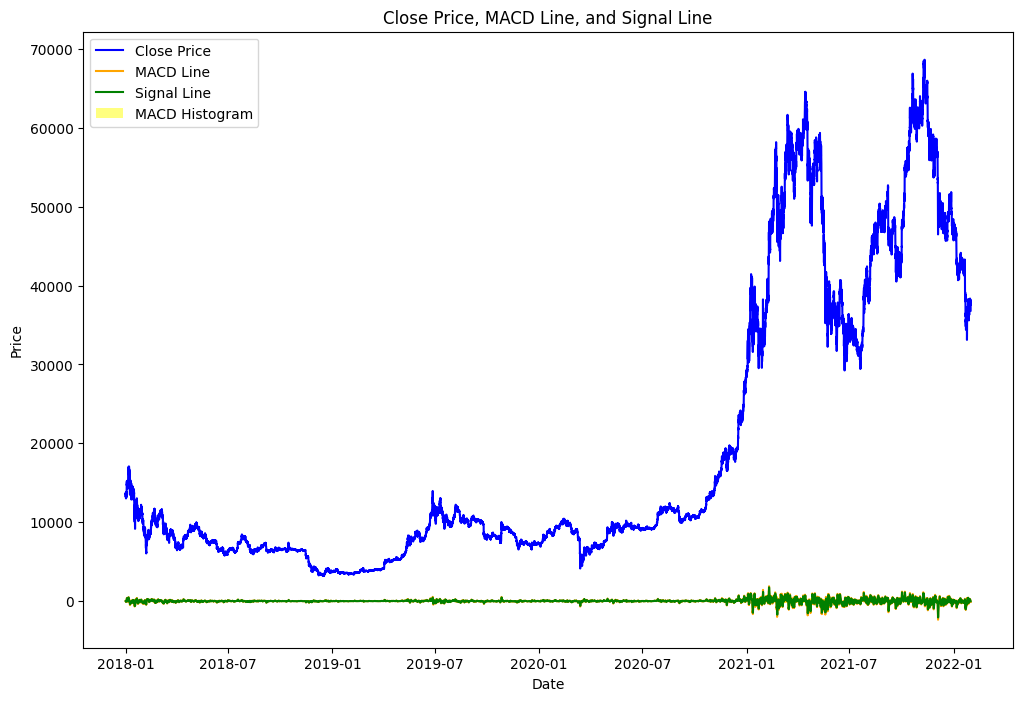

In [38]:
# Define a function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    # Calculate Short-term Exponential Moving Average (EMA)
    short_ema = data['close'].ewm(span=short_window, adjust=False).mean()

    # Calculate Long-term Exponential Moving Average (EMA)
    long_ema = data['close'].ewm(span=long_window, adjust=False).mean()

    # Calculate MACD Line
    data['macd_line'] = short_ema - long_ema

    # Calculate Signal Line
    data['signal_line'] = data['macd_line'].ewm(span=signal_window, adjust=False).mean()

    # Calculate MACD Histogram
    data['macd_histogram'] = data['macd_line'] - data['signal_line']

# Calculate MACD and add it to the DataFrame
calculate_macd(df)
# Plot the Close Price, MACD Line, and Signal Line
plt.figure(figsize=(12, 8))
plt.plot(df['datetime'], df['close'], label='Close Price', color='blue')
plt.plot(df['datetime'], df['macd_line'], label='MACD Line', color='orange')
plt.plot(df['datetime'], df['signal_line'], label='Signal Line', color='green')

# Plot MACD Histogram as a bar chart
plt.bar(df['datetime'], df['macd_histogram'], label='MACD Histogram', color='yellow', alpha=0.5)

plt.title('Close Price, MACD Line, and Signal Line')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [39]:
# saving dataframe to csv file
df.to_csv('E:/KDSH/data.csv', index=False)